In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utilities import select_by_date

/home/boada/.local/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
# Filter to explore only the training data
start_date = '2016-01-01'
end_date = '2016-12-31'

FIGSIZE = (6, 6)
df = pd.read_csv("./data/inspections.csv")
df.inspection_date = pd.to_datetime(df.inspection_date)
df = select_by_date(df, start_date, end_date)
print("Training Data: N = {}".format(len(df)))
df.head().T

Training Data: N = 28180


,0,1,2,3,4
camis,41471993,50016849,40670353,40585345,40585345
dba,NEW MEI MEI CHINESE RESTAURANT,WIBAR,DUKE'S,SUSHIYA JAPANESE RESTAURANT,SUSHIYA JAPANESE RESTAURANT
boro,Brooklyn,Queens,Manhattan,Manhattan,Manhattan
zipcode,11229,11369,10016,10019,10019
cuisine_description,Chinese,American,American,Japanese,Japanese
inspection_date,2016-01-04 00:00:00,2016-01-05 00:00:00,2016-01-05 00:00:00,2016-01-05 00:00:00,2016-01-05 00:00:00
action,Violations were cited in the following area(s).,Violations were cited in the following area(s).,Violations were cited in the following area(s).,Violations were cited in the following area(s).,Violations were cited in the following area(s).
violation_code,04L,10F,06C,04C,10B
violation_description,Evidence of mice or live mice present in facil...,Non-food contact surface improperly constructe...,Food not protected from potential source of co...,Food worker does not use proper utensil to eli...,Plumbing not properly installed or maintained;...
critical_flag,Y,N,Y,Y,N


In [3]:
pd.to_datetime(df["inspection_date"]).describe()

count                   28180
unique                    322
top       2016-10-12 00:00:00
freq                      288
first     2016-01-04 00:00:00
last      2016-12-31 00:00:00
Name: inspection_date, dtype: object

<IPython.core.display.Javascript object>


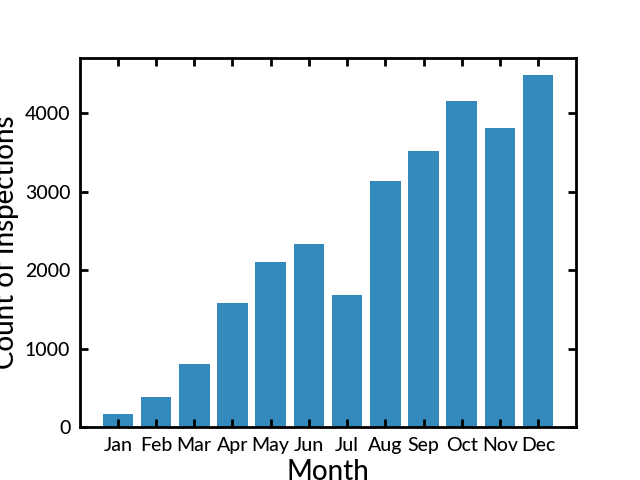

Text(0, 0.5, 'Count of Inspections')

In [4]:
month_hist = pd.to_datetime(df["inspection_date"]).dt.month
month_hist = month_hist.value_counts().sort_index()
month_hist.index = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
plt.bar(month_hist.index, month_hist.values)
plt.xlabel("Month")
plt.ylabel("Count of Inspections")

<IPython.core.display.Javascript object>


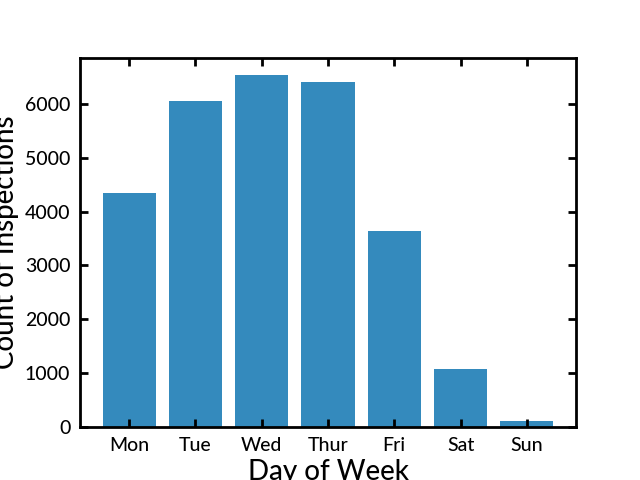

Text(0, 0.5, 'Count of Inspections')

In [5]:
day_hist = pd.to_datetime(df["inspection_date"]).dt.weekday
day_hist = day_hist.value_counts().sort_index()
day_hist.index = ["Mon", "Tue", "Wed", "Thur", "Fri", "Sat", "Sun"]
plt.bar(day_hist.index, day_hist.values)
plt.xlabel("Day of Week")
plt.ylabel("Count of Inspections")

<IPython.core.display.Javascript object>


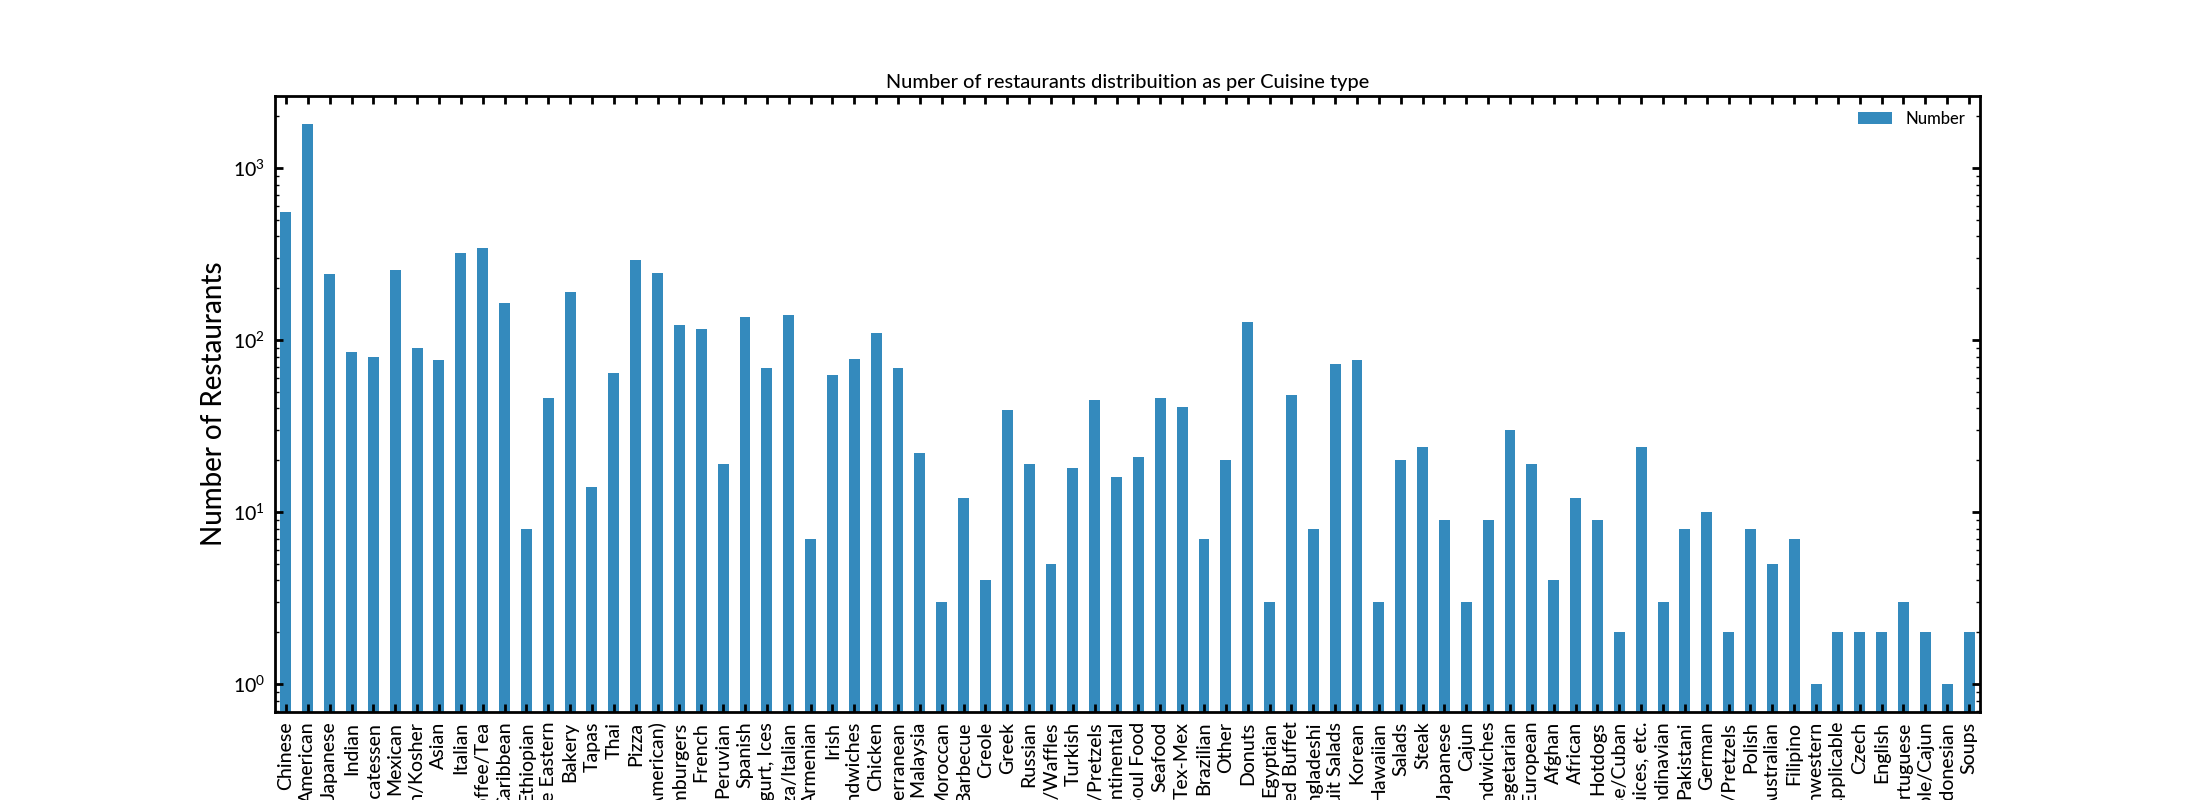

[]

In [6]:
cus = []
cus_n = []
for i in df["cuisine_description"].unique():
    cus.append(i)
    cus_n.append(df[df["cuisine_description"]==i]["camis"].nunique())
my_data_cus = { 'Cuisine Description':cus,'Number':cus_n}
my_data_cus = pd.DataFrame(my_data_cus)
my_data_cus.plot(x="Cuisine Description", y=["Number"], kind="bar",figsize=(22,8))
plt.title('Number of restaurants distribuition as per Cuisine type')
plt.ylabel('Number of Restaurants')
plt.semilogy()

<IPython.core.display.Javascript object>


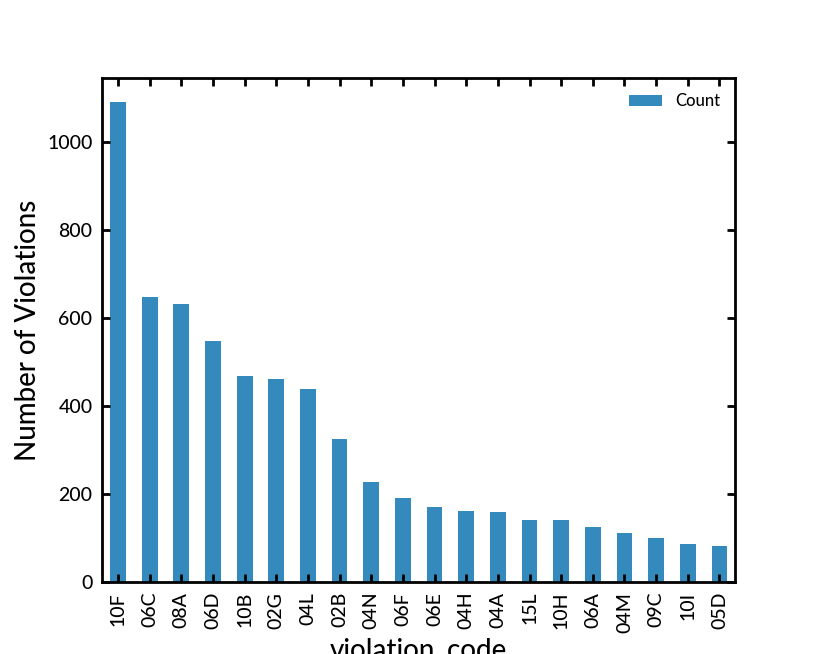

Text(0, 0.5, 'Number of Violations')

In [21]:
#Now let us check the distribution of Violation Types
df_v = df.groupby(['violation_code'],as_index=False)['camis'].count()
df_v.rename(columns={'camis': 'Count'}, inplace=True)
df_v.sort_values(by='Count', ascending=False, inplace=True)
df_v.reset_index(drop=True,inplace=True)
df_v.head(20).plot.bar(x='violation_code', y='Count')
plt.ylabel('Number of Violations')

Total Number of times Restaurants closed by the Health Inspectors are 535


<IPython.core.display.Javascript object>


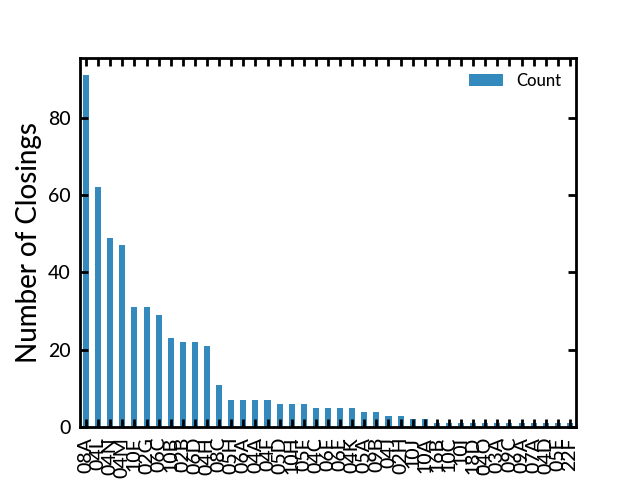

Text(0, 0.5, 'Number of Closings')

In [32]:
my_data_closed = df[df['action'].str.contains("Establishment Closed|Establishment re-closed")]
print ('Total Number of times Restaurants closed by the Health Inspectors are',my_data_closed['action'].count())

my_data_cr = my_data_closed.groupby(['violation_code'],as_index=False)['camis'].count()
my_data_cr.rename(columns={'camis': 'Count'}, inplace=True)
my_data_cr.sort_values(by='Count', ascending=False, inplace=True)
my_data_cr.reset_index(drop=True,inplace=True)
my_data_cr.plot.bar(x='violation_code', y='Count')
plt.ylabel('Number of Closings')